we wil first import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv(r"Desktop/data.csv")

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.drop('id',axis=1,inplace=True)

In [7]:
features = list(data.columns[1:30])
print (features)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [8]:
target = data.columns[0:1]
print (target)

Index(['diagnosis'], dtype='object')


In [9]:
X = data[features] #our features that we will use to predict Y
Y = data[target]

In [10]:
X = StandardScaler().fit_transform(X)

In [11]:
pd.DataFrame(data = X, columns = features).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353


In [12]:
pca = PCA(n_components=3)

In [13]:
principalComponents = pca.fit_transform(X)

In [14]:
principalDf = pd.DataFrame(data = principalComponents)

In [15]:
principalDf.head(10)

,0,1,2
0,8.966336,1.984413,-1.499346
1,2.463064,-3.856484,-0.100927
2,5.777253,-0.841503,-0.698721
3,6.283637,9.494189,-3.799608
4,4.077171,-1.544880,1.258650
5,1.999996,3.421237,-3.108249
6,2.313748,-2.749412,-1.428911
7,1.878913,2.009896,-0.842876
8,2.931571,3.140322,-3.479619
9,5.310474,6.103755,-3.600915


In [16]:
pca.explained_variance_ratio_

array([0.45067848, 0.18239963, 0.09159257])

In [17]:
pca.explained_variance_ratio_.cumsum()

array([0.45067848, 0.63307812, 0.72467069])

In [18]:
data[['diagnosis']].head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [19]:
finalDf = pd.concat([principalDf, data[['diagnosis']]], axis = 1)
finalDf.head(5)

,0,1,2,diagnosis
0,8.966336,1.984413,-1.499346,M
1,2.463064,-3.856484,-0.100927,M
2,5.777253,-0.841503,-0.698721,M
3,6.283637,9.494189,-3.799608,M
4,4.077171,-1.544880,1.258650,M


In [20]:
comp=principalDf[principalDf.columns[0:3]]

In [21]:
comp.head(10)

,0,1,2
0,8.966336,1.984413,-1.499346
1,2.463064,-3.856484,-0.100927
2,5.777253,-0.841503,-0.698721
3,6.283637,9.494189,-3.799608
4,4.077171,-1.544880,1.258650
5,1.999996,3.421237,-3.108249
6,2.313748,-2.749412,-1.428911
7,1.878913,2.009896,-0.842876
8,2.931571,3.140322,-3.479619
9,5.310474,6.103755,-3.600915


(array([[ 31., 202., 129.,  77.,  77.,  31.,  14.,   4.,   3.,   1.],
        [ 10.,  95., 257., 152.,  39.,  10.,   5.,   0.,   1.,   0.],
        [  1.,  55., 320., 169.,  17.,   6.,   0.,   1.,   0.,   0.]]),
 array([-6.50674761, -4.18159626, -1.85644491,  0.46870644,  2.79385779,
         5.11900915,  7.4441605 ,  9.76931185, 12.0944632 , 14.41961455,
        16.7447659 ]),
 <a list of 3 BarContainer objects>)

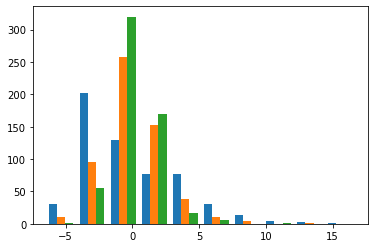

In [22]:
plt.hist(comp)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

In [24]:
km = KMeans(init='k-means++', n_clusters=2)
km.fit(X_train)

KMeans(n_clusters=2)

In [25]:
km.cluster_centers_

array([[-0.50530228, -0.29812554, -0.51664016, -0.49754917, -0.21636847,
        -0.45028083, -0.52601205, -0.5424932 , -0.261985  , -0.03189243,
        -0.45268713, -0.04750194, -0.44280715, -0.41581512,  0.04848832,
        -0.30456957, -0.28332211, -0.34135287, -0.06661386, -0.1823686 ,
        -0.53865053, -0.29277394, -0.54335059, -0.51605468, -0.21292133,
        -0.42229744, -0.47010693, -0.52783499, -0.27838351],
       [ 1.08551869,  0.50140395,  1.11875561,  1.08955121,  0.67133047,
         1.04529873,  1.15438817,  1.26460033,  0.57838983,  0.18924898,
         0.94226606,  0.02081375,  0.91912581,  0.93220873,  0.04757535,
         0.55851322,  0.44025596,  0.71285891,  0.10886951,  0.30627234,
         1.16703574,  0.55662331,  1.1854233 ,  1.14811959,  0.71227726,
         0.9789828 ,  1.02361665,  1.23358149,  0.64145721]])

In [27]:
predictions = km.predict(X_test)

In [28]:
print(predictions)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1
 0 1 0]


In [29]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [30]:
print(km.labels_)
print(y_test)

[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0]
    diagnosis
478         B
409         B
166         B
462         B
344         B
..        ...
429         B
108         M
217         B
479         M
44          M

[188 rows x 1 columns]


In [31]:
km2 = KMeans(init='k-means++', n_clusters=3)
km2.fit(X_train)
km2.cluster_centers_

array([[ 1.72505994,  0.61090367,  1.73903123,  1.81082643,  0.46904158,
         1.04158173,  1.35981419,  1.60134193,  0.4388797 , -0.20401892,
         1.54525007,  0.13109309,  1.50706309,  1.6037846 , -0.04139941,
         0.46339636,  0.44029204,  0.81093572,  0.04543745,  0.16235482,
         1.78010129,  0.57096378,  1.77792313,  1.85425087,  0.38331257,
         0.75596544,  0.96531013,  1.34489234,  0.31761887],
       [-0.50969293, -0.31128774, -0.52726516, -0.49886836, -0.29840089,
        -0.55826768, -0.60771634, -0.60721659, -0.34382462, -0.13238284,
        -0.46131505, -0.07081293, -0.46424724, -0.41748869, -0.00712146,
        -0.42116912, -0.38170742, -0.4553517 , -0.07612884, -0.28008607,
        -0.54467609, -0.30632047, -0.55914304, -0.518046  , -0.29415401,
        -0.52743351, -0.56965809, -0.61016589, -0.32756488],
       [ 0.02162025,  0.19265416,  0.0774239 , -0.05682521,  0.82783741,
         0.910691  ,  0.6921723 ,  0.59191353,  0.69198964,  0.78322448,
  

In [32]:
km3 = KMeans(init='k-means++', n_clusters=5)
km3.fit(X_train)
km3.cluster_centers_

array([[ 0.93909068,  0.39986564,  0.92808286,  0.86392332,  0.27172619,
         0.38094962,  0.6011932 ,  0.7990708 ,  0.14308844, -0.40607293,
         0.42945053, -0.02242808,  0.40023638,  0.42219977, -0.09003266,
         0.08592467,  0.13658229,  0.41821347, -0.22435537, -0.09305947,
         0.9332145 ,  0.44140677,  0.91236046,  0.83230868,  0.4049631 ,
         0.40388741,  0.55554364,  0.83808827,  0.20521935],
       [ 2.04391719,  0.6161386 ,  2.09652409,  2.25040209,  0.72532329,
         1.6463967 ,  1.93402804,  2.15197604,  0.81931107,  0.11003637,
         2.31277648, -0.03751511,  2.28343041,  2.43637181, -0.06797612,
         0.76861806,  0.68347707,  1.04687895,  0.3010647 ,  0.32860328,
         2.1870202 ,  0.48285297,  2.22335407,  2.39806043,  0.44721351,
         1.14003506,  1.33172079,  1.76077166,  0.60791941],
       [-0.33665053, -0.28562869, -0.36668939, -0.37607531, -0.58665443,
        -0.62914983, -0.62031518, -0.62066054, -0.58247953, -0.4208521 ,
  

In [48]:
import seaborn as sns

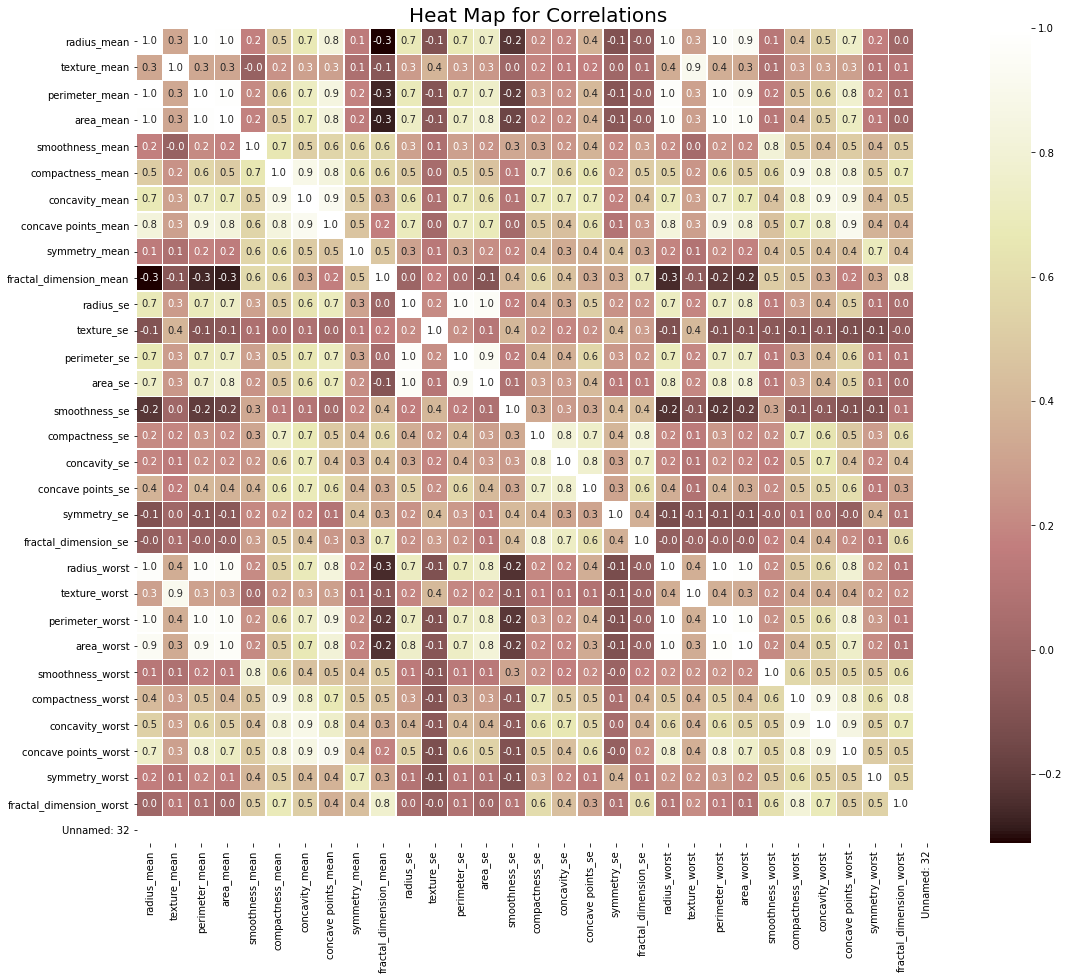

In [49]:
plt.rcParams['figure.figsize'] = (18, 15)

sns.heatmap(data.corr(), cmap = 'pink', annot = True, linewidths = 0.5, fmt = '.1f')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

<ipython-input-51-af8d87949085>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training accuracy : 1.0
Testing accuarcy : 0.9521276595744681
              precision    recall  f1-score   support

           B       0.96      0.97      0.96       122
           M       0.94      0.92      0.93        66

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



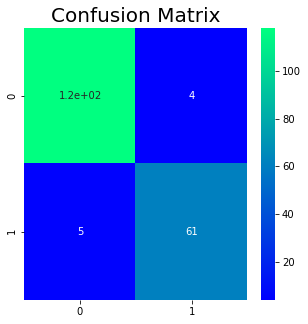

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# creating a model
model = RandomForestClassifier(n_estimators = 400, max_depth = 10)

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuarcy :", model.score(X_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [53]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
model = RandomForestClassifier() 
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 26


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Training Accuracy : 1.0
Testing Accuracy : 0.9361702127659575


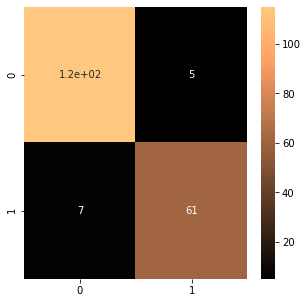

In [54]:
y_pred = rfecv.predict(X_test)

print("Training Accuracy :", rfecv.score(X_train, y_train))
print("Testing Accuracy :", rfecv.score(X_test, y_test))

cm = confusion_matrix(y_pred, y_test)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()

we can see the accuracy of our model is 93.61%. So we can conclude that our model is a good fit.